<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/IITH SURE/Same Diameter Data.xlsx'
aggregated_data = pd.read_excel(filepath, sheet_name='Aggregated_Data')
aggregated_data = aggregated_data.dropna(how="all")
aggregated_data = aggregated_data.fillna(method = "ffill")
aggregated_data.head()

,Radius of Cylinder (in mm),Gap Width Theoretical (in mm),Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm)
0,50.0,5.0,7.644,1.127,5.356,0.611
1,50.0,10.0,7.680,0.529,8.201,1.076
2,50.0,15.0,6.913,0.871,14.001,0.509
3,50.0,20.0,6.894,0.403,18.091,0.378
4,50.0,25.0,6.812,0.332,24.179,1.050


In [ ]:
mm_25_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 25]
mm_50_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 50]
mm_40_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 40]

# D1 = D2 = 25 mm

In [ ]:
mm_25_data = pd.read_excel(filepath, sheet_name='Diameter_25mm')
mm_25_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' avg.,Bubble Behaviour,Jet's Direction,Mean Radius (in mm),Std. Deviation Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,20.0,20.087,0.1250,1.0,55.0,7.6667,7.173882,2.800018,2.801461,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,6.861112,0.337745,18.274815,0.901416,NaN
1,NaN,19.220,NaN,2.0,52.0,7.5833,6.857173,2.802904,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.043,0.0625,1.0,51.0,7.5750,6.732673,2.828446,2.843198,Split Collapse,Equal flow towards both walls,NaN,NaN,NaN,NaN,Larger volume of jet towards larger diameter c...
4,NaN,18.834,NaN,2.0,49.0,7.5750,6.468647,2.911583,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with medium velocity,NaN,NaN,NaN,NaN,NaN


In [ ]:
required_data = mm_25_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,b,b'
0,20.087,0.1250,2.800018,Jetting Towards Nearer Wall,2.510875,0.250
1,19.220,0.1250,2.802904,Jetting Towards Nearer Wall,2.402500,0.250
3,19.043,0.0625,2.828446,Split Collapse,1.190187,0.125
4,18.834,0.0625,2.911583,Jetting Towards Nearer Wall,1.177125,0.125
5,18.717,0.0625,2.789567,Jetting Towards Nearer Wall,1.169812,0.125
...,...,...,...,...,...,...
133,5.046,0.1250,0.740208,Centre Collapse,0.630750,0.250
134,6.849,0.1250,0.923481,Split Collapse,0.856125,0.250
136,6.371,0.0625,0.870117,Centre Collapse,0.398188,0.125
137,5.792,0.0625,0.733768,Centre Collapse,0.362000,0.125


In [ ]:
mm_25_spherical_collapse = required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']
mm_25_jetting_towards = required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']
mm_25_jetting_away = required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']
mm_25_split_collapse = required_data[required_data['Bubble Behaviour'] == 'Split Collapse']
mm_25_centre_collapse = required_data[required_data['Bubble Behaviour'] == 'Centre Collapse']

In [ ]:
min_W_dash_25 = [min(mm_25_jetting_towards["W'"]), min(mm_25_spherical_collapse["W'"]), min(mm_25_split_collapse["W'"]), min(mm_25_jetting_away["W'"]), min(mm_25_centre_collapse["W'"]), 0]
max_W_dash_25 = [max(mm_25_jetting_towards["W'"]), max(mm_25_spherical_collapse["W'"]), max(mm_25_split_collapse["W'"]), max(mm_25_jetting_away["W'"]), max(mm_25_centre_collapse["W'"]), 0]

min_b_25 = [min(mm_25_jetting_towards["b"]), min(mm_25_spherical_collapse["b"]), min(mm_25_split_collapse["b"]), min(mm_25_jetting_away["b"]), min(mm_25_centre_collapse["b"]), 0]
max_b_25 = [max(mm_25_jetting_towards["b"]), max(mm_25_spherical_collapse["b"]), max(mm_25_split_collapse["b"]), max(mm_25_jetting_away["b"]), max(mm_25_centre_collapse["b"]), 0]

min_b_dash_25 = [min(mm_25_jetting_towards["b'"]), min(mm_25_spherical_collapse["b'"]), min(mm_25_split_collapse["b'"]), min(mm_25_jetting_away["b'"]), min(mm_25_centre_collapse["b'"]), 0]
max_b_dash_25 = [max(mm_25_jetting_towards["b'"]), max(mm_25_spherical_collapse["b'"]), max(mm_25_split_collapse["b'"]), max(mm_25_jetting_away["b'"]), max(mm_25_centre_collapse["b'"]), 0]

# D1 = D2 = 40 mm

In [ ]:
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset ratio,Exp No.,Conversion Factor (in pixels/mm),Max Radius (in pixels),Max Radius (in mm),W',W'_Avg,Bubble Behaviour,Jet Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,45.0,43.280,0.250,1.0,NaN,NaN,6.811,6.354427,6.185567,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,6.727051,0.741206,47.083948,2.082903,NaN
1,NaN,43.086,NaN,2.0,NaN,NaN,7.280,5.918407,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,45.690,NaN,3.0,NaN,NaN,7.271,6.283867,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.231,0.125,1.0,NaN,NaN,7.474,6.319374,6.751023,Spherical Collapse,No flow towards Solid Wall,NaN,NaN,NaN,NaN,Significant amount of small bubble like struct...


In [ ]:
required_data = mm_40_data[['Gap Width Experimental (in mm)', 'Offset ratio', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset ratio']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data

,Gap Width Experimental (in mm),Offset ratio,W',Bubble Behaviour,b,b'
0,43.28000,0.2500,6.354427,Jetting Towards Nearer Wall,10.820000,0.500
1,43.08600,0.2500,5.918407,Jetting Towards Nearer Wall,10.771500,0.500
2,45.69000,0.2500,6.283867,Jetting Towards Nearer Wall,11.422500,0.500
4,47.23100,0.1250,6.319374,Spherical Collapse,5.903875,0.250
5,46.10800,0.1250,6.779591,Spherical Collapse,5.763500,0.250
...,...,...,...,...,...,...
140,5.02200,0.1250,0.569033,Centre Collapse,0.627750,0.250
141,4.60100,0.1250,0.494518,Centre Collapse,0.575125,0.250
143,4.53100,0.0625,0.553269,Centre Collapse,0.283187,0.125
144,4.36200,0.0625,0.454612,Centre Collapse,0.272625,0.125


In [ ]:
mm_40_spherical_collapse = required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']
mm_40_centre_collapse = required_data[required_data['Bubble Behaviour'] == 'Centre Collapse']
mm_40_split_after_collapse = required_data[required_data['Bubble Behaviour'] == 'Split After Collapse']
mm_40_split_collapse = required_data[required_data['Bubble Behaviour'] == 'Split Collapse']
mm_40_jetting_towards = required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']
mm_40_jetting_away = required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']

In [22]:
min_W_dash_40 = [min(mm_40_jetting_towards["W'"]), min(mm_40_spherical_collapse["W'"]), min(mm_40_split_collapse["W'"]), min(mm_40_jetting_away["W'"]), min(mm_40_centre_collapse["W'"]), min(mm_40_split_after_collapse["W'"])]
max_W_dash_40 = [max(mm_40_jetting_towards["W'"]), max(mm_40_spherical_collapse["W'"]), max(mm_40_split_collapse["W'"]), max(mm_40_jetting_away["W'"]), max(mm_40_centre_collapse["W'"]), max(mm_40_split_after_collapse["W'"])]

min_b_40 = [min(mm_40_jetting_towards["b"]), min(mm_40_spherical_collapse["b"]), min(mm_40_split_collapse["b"]), min(mm_40_jetting_away["b"]), min(mm_40_centre_collapse["b"]), min(mm_40_split_after_collapse["b"])]
max_b_40 = [max(mm_40_jetting_towards["b"]), max(mm_40_spherical_collapse["b"]), max(mm_40_split_collapse["b"]), max(mm_40_jetting_away["b"]), max(mm_40_centre_collapse["b"]), max(mm_40_split_after_collapse["b"])]

min_b_dash_40 = [min(mm_40_jetting_towards["b'"]), min(mm_40_spherical_collapse["b'"]), min(mm_40_split_collapse["b'"]), min(mm_40_jetting_away["b'"]), min(mm_40_centre_collapse["b'"]), min(mm_40_split_after_collapse["b'"])]
max_b_dash_40 = [max(mm_40_jetting_towards["b'"]), max(mm_40_spherical_collapse["b'"]), max(mm_40_split_collapse["b'"]), max(mm_40_jetting_away["b'"]), max(mm_40_centre_collapse["b'"]), max(mm_40_split_after_collapse["b'"])]

# D1 = D2 = 50 mm

In [ ]:
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' Avg.,Bubble Behaviour,Jet_Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,25.0,24.514,0.06250,1.0,57.0,8.3014,6.866312,3.570185,3.518056,Split After Collapse,Towards nearer wall with low velocity,6.811829,0.331887,24.179226,1.049858,"Dumpbell-like shape, larger volume towards nea..."
1,NaN,24.828,NaN,2.0,59.0,8.2167,7.180498,3.457699,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
2,NaN,24.562,NaN,3.0,57.0,8.1833,6.965405,3.526284,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26.574,0.03125,1.0,52.0,7.6015,6.840755,3.884659,3.645259,Spherical Collapse,Towards nearer solid wall with low velocity,NaN,NaN,NaN,NaN,NaN


In [ ]:
required_data = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,b,b'
0,24.514,0.06250,3.570185,Split After Collapse,1.532125,0.1250
1,24.828,0.06250,3.457699,Split After Collapse,1.551750,0.1250
2,24.562,0.06250,3.526284,Split After Collapse,1.535125,0.1250
4,26.574,0.03125,3.884659,Spherical Collapse,0.830438,0.0625
5,24.106,0.03125,3.568633,Spherical Collapse,0.753313,0.0625
...,...,...,...,...,...,...
135,5.604,0.12500,0.638045,Jetting Away From Nearer Wall,0.700500,0.2500
136,5.763,0.12500,0.637647,Jetting Away From Nearer Wall,0.720375,0.2500
138,5.525,0.06250,0.632393,Jetting Away From Nearer Wall,0.345313,0.1250
139,4.984,0.06250,0.535254,Jetting Away From Nearer Wall,0.311500,0.1250


In [ ]:
mm_50_spherical_collapse = required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']
mm_50_split_after_collapse = required_data[required_data['Bubble Behaviour'] == 'Split After Collapse']
mm_50_split_collapse = required_data[required_data['Bubble Behaviour'] == 'Split Collapse']
mm_50_jetting_towards = required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']
mm_50_jetting_away = required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']

In [ ]:
min_W_dash_50 = [min(mm_50_jetting_towards["W'"]), min(mm_50_spherical_collapse["W'"]), min(mm_50_split_collapse["W'"]), min(mm_50_jetting_away["W'"]), 0, min(mm_50_split_after_collapse["W'"])]
max_W_dash_50 = [max(mm_50_jetting_towards["W'"]), max(mm_50_spherical_collapse["W'"]), max(mm_50_split_collapse["W'"]), max(mm_50_jetting_away["W'"]), 0, max(mm_50_split_after_collapse["W'"])]

min_b_50 = [min(mm_50_jetting_towards["b"]), min(mm_50_spherical_collapse["b"]), min(mm_50_split_collapse["b"]), min(mm_50_jetting_away["b"]), 0, min(mm_50_split_after_collapse["b"])]
max_b_50 = [max(mm_50_jetting_towards["b"]), max(mm_50_spherical_collapse["b"]), max(mm_50_split_collapse["b"]), max(mm_50_jetting_away["b"]), 0, max(mm_50_split_after_collapse["b"])]

min_b_dash_50 = [min(mm_50_jetting_towards["b'"]), min(mm_50_spherical_collapse["b'"]), min(mm_50_split_collapse["b'"]), min(mm_50_jetting_away["b'"]), 0, min(mm_50_split_after_collapse["b'"])]
max_b_dash_50 = [max(mm_50_jetting_towards["b'"]), max(mm_50_spherical_collapse["b'"]), max(mm_50_split_collapse["b'"]), max(mm_50_jetting_away["b'"]), 0, max(mm_50_split_after_collapse["b'"])]

<ipython-input-33-e83289b3017d>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


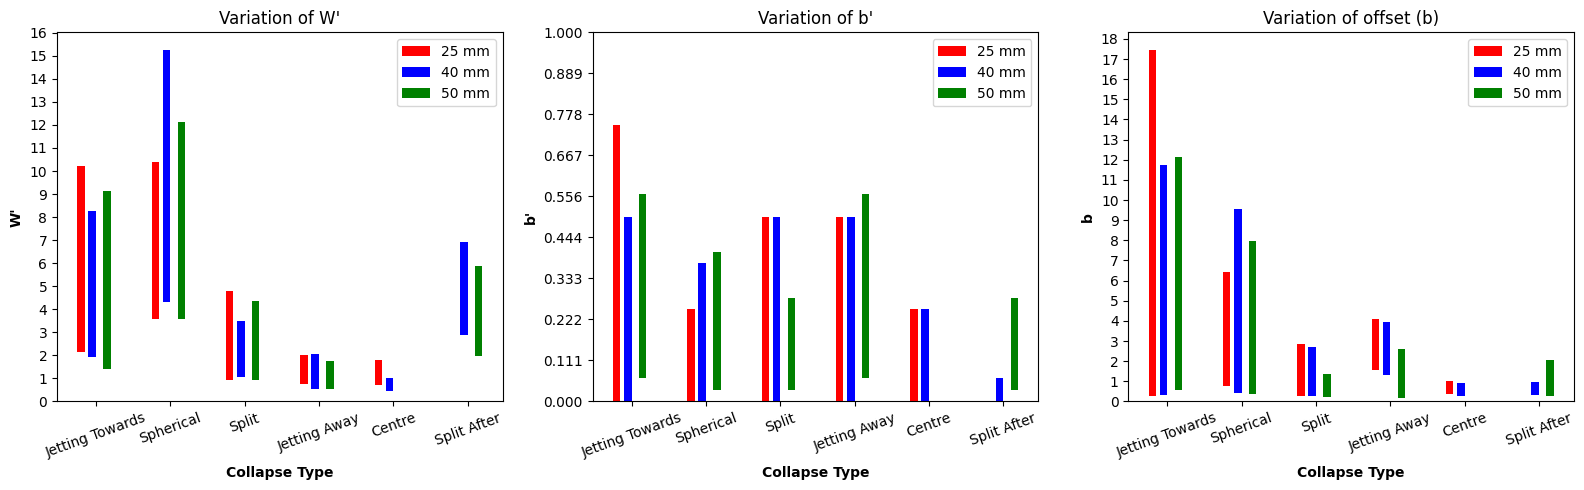

In [33]:
x = ["Jetting Towards", 'Spherical', 'Split', 'Jetting Away',  'Centre', 'Split After']
x_axis = np.arange(len(x))
plt.subplots(figsize=(16, 5))

#Plot for W'
plt.subplot(1, 3, 1)
plt.bar(x_axis-0.2, max_W_dash_25, 0.1, bottom = min_W_dash_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_W_dash_40, 0.1, bottom = min_W_dash_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_W_dash_50, 0.1, bottom = min_W_dash_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 17, 1)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("W'", fontweight = 'bold')
plt.legend()
plt.title("Variation of W'")

#Plot for b'
plt.subplot(1, 3, 2)
plt.bar(x_axis-0.2, max_b_dash_25, 0.1, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_b_dash_40, 0.1, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_b_dash_50, 0.1, bottom = min_b_dash_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks(np.linspace(0, 1, 10))
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("b'", fontweight = 'bold')
plt.legend()
plt.title("Variation of b'")

# Plot for b
plt.subplot(1, 3, 3)
plt.bar(x_axis-0.2, max_b_25, 0.1, bottom = min_b_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_b_40, 0.1, bottom = min_b_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_b_50, 0.1, bottom = min_b_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 19, 1)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("b", fontweight = 'bold')
plt.legend()
plt.title("Variation of offset (b)")

plt.tight_layout()
plt.show()